# JORDI BLASCO LOZANO
## 12. EXPLORACIÓN DE GRAFOS
importamos las librerías necesarias

In [5]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

Creamos los grafos que necesitemos según la parte 1 de la práctica

In [6]:
G1 = nx.erdos_renyi_graph(10, 0.4, seed=1) 

G2 = nx.barabasi_albert_graph(10, 2, seed=1)

G3 = nx.watts_strogatz_graph(10, 2, 0.2, seed=1)

G4 = nx.random_tree(10, seed=1)

G5 = nx.stochastic_block_model([5, 5], [[1, 0.2], [0.2, 1]], seed=3)


Definimos las funciones `random_walk` y `hitting_time`. El `random_walk` es un bucle que se repite hasta que el nodo actual sea igual al nodo destino, en cada iteración se elige un nodo aleatorio de los vecinos del nodo actual. Mientras que el `hitting_time` es una función que calcula el tiempo que tarda en llegar de un nodo a otro mediante random walks, se hace 1000 veces y se calcula la media de los pasos que se han necesitado para llegar al nodo destino. Se hace de ida y vuelta para que sea más preciso.

In [7]:
def random_walk(G, start_node,destination_node):
    current_node = start_node
    path = [current_node]
    while current_node != destination_node:
        neighbors = list(G.neighbors(current_node))
        current_node = np.random.choice(neighbors)
        path.append(current_node)
    return path

# Now we are going to create the function hitting time, that calculates the number of steps it takes to go from one node to another using random walks

def hitting_time(G, start_node, destination_node, num_walks=1000):
    hitting_times = []
    # From node_i to node_j
    for _ in range(num_walks):
        path = random_walk(G, start_node, destination_node)
        hitting_times.append(len(path))
    # From node_j to node_i
    for _ in range(num_walks):
        path = random_walk(G, destination_node, start_node)
        hitting_times.append(len(path))
    return np.mean(hitting_times)

## EJERCICIO 1
Esta función calcula la matriz de hitting time, mediante dos bucles anidados. Por cada nodo del grafo calcula con `hitting_time` el tiempo que tarda en llegar 1000 veces con un random walk a un nodo destino. Se representará mediante la matriz (filas_nodo_origen, columnas_nodo_destino) 

In [8]:
def hit(G):
    M = np.zeros((len(G.nodes), len(G.nodes)))
    for i in range(len(G.nodes)):
        for j in range(i+1, len(G.nodes)):
            M[i, j] = hitting_time(G, i, j)
            M[j, i] = M[i, j]
    return M

hitG1 = hit(G1)
hitG2 = hit(G2)
hitG3 = hit(G3)
hitG4 = hit(G4)
hitG5 = hit(G5)

print('Grafo 1', hitG1, '\n\n','Grafo 2', hitG2, '\n\n','Grafo 3', hitG3, '\n\n','Grafo 4', hitG4, '\n\n','Grafo 5', hitG5)



Grafo 1 [[ 0.     10.5365 13.5255 16.9865 10.3765 15.9565 12.4085 14.31   34.327
   9.62  ]
 [10.5365  0.      9.3205 15.6255 10.4185 14.648   9.3515 12.681  33.036
   8.875 ]
 [13.5255  9.3205  0.     14.907  10.277  11.292   8.8415 12.0955 31.8515
   9.563 ]
 [16.9865 15.6255 14.907   0.     10.2275 15.395   9.815  10.1715 29.218
  12.796 ]
 [10.3765 10.4185 10.277  10.2275  0.     10.1195  7.149   8.242  27.6865
   7.937 ]
 [15.9565 14.648  11.292  15.395  10.1195  0.      9.3795 14.3545 32.329
  13.116 ]
 [12.4085  9.3515  8.8415  9.815   7.149   9.3795  0.      8.597  27.712
   9.0495]
 [14.31   12.681  12.0955 10.1715  8.242  14.3545  8.597   0.     20.292
   9.294 ]
 [34.327  33.036  31.8515 29.218  27.6865 32.329  27.712  20.292   0.
  28.7545]
 [ 9.62    8.875   9.563  12.796   7.937  13.116   9.0495  9.294  28.7545
   0.    ]] 

 Grafo 2 [[ 0.     10.5805 11.6955  6.6415  8.309  10.484  12.106  11.4735 13.675
  15.7465]
 [10.5805  0.     19.058  10.546  14.059  16.362  17.496

In [9]:
# para la conclusión 
print(np.mean(hitG1),np.mean(hitG2),np.mean(hitG3),np.mean(hitG4),np.mean(hitG5)) 

13.449310000000002 13.091659999999997 18.73846 22.823759999999993 10.44731


## Conclusión 
Podemos ver claramente como según la media de hitting time que hemos sacado anteriormente, el `erdos_renyi_graph` y el `barabasi_albert_graph`  son grafos rápidos y comparandolos con la parte anterior de la práctica podemos sacar la conclusión de que se debe a que tienen muchas más conexiones y no necesitan pasar por tantos nodos intermedios para que la información pueda llegar de un nodo a otro. Por otro lado, el `random_tree` y el `stochastic_block_model` son los que más tardan en llegar de un nodo a otro, ya que tienen menos conexiones. Por último, el `watts_strogatz_graph` es el que menos tarda en llegar de un nodo a otro con diferencia, ya que tiene un número de conexiones muy alto y por lo tanto es muy fácil llegar de un nodo a otro. Para mejorar el tiempo de hitting time en los grafos se podría añadir más conexiones entre los nodos para que sea más fácil llegar de un nodo a otro aunque esto repercutiría en la complejidad del grafo y los recursos que se necesitarían para crearlo y manejarlo.

## Ejercicio 2
Esta funcion imprime en un mapa de colores los tiempos del hitting time anteriores, funciona tanto si le pasas un grafo como si le pasas una np.array

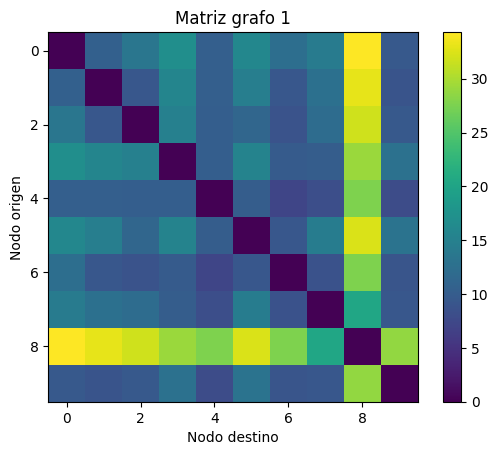

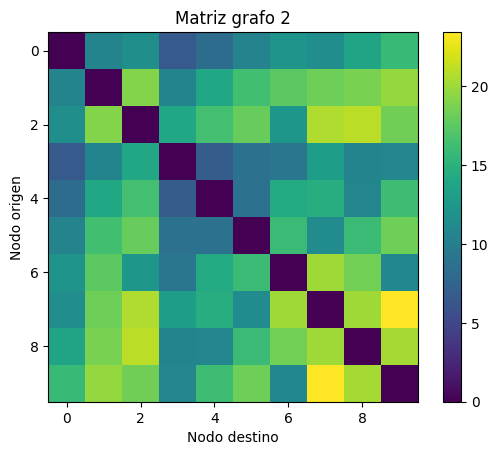

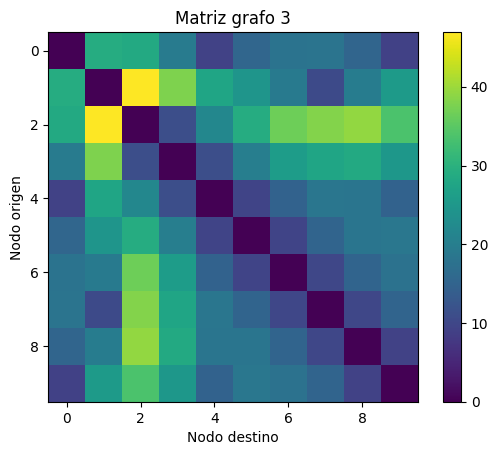

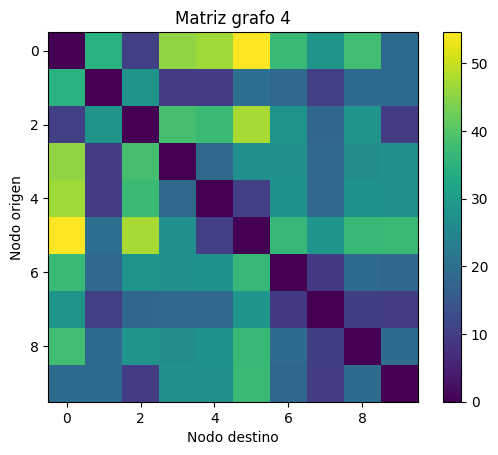

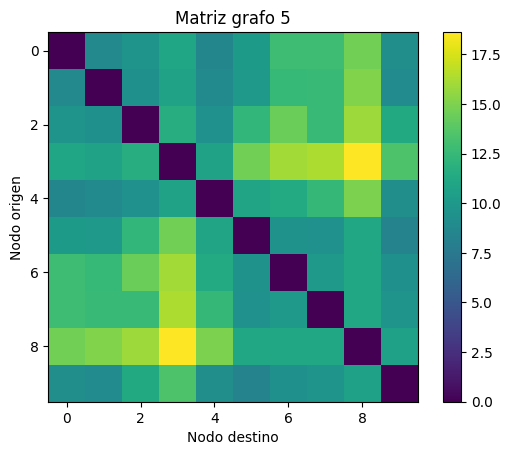

In [10]:
def imprimirColores(M, nombre=' de grafo'):
    if M.__class__ == nx.Graph: #basicamente he puesto que si la variable M es un grafo que saque antes la matriz de hits y si no pues que lo haga con la matriz de hits que le pases
        G = M
        M = hit(G)
    plt.imshow(M)
    plt.colorbar()
    plt.title(('Matriz grafo '+ nombre ))
    plt.xlabel('Nodo destino')
    plt.ylabel('Nodo origen')
    plt.show()
    
imprimirColores(hitG1, '1')
imprimirColores(hitG2, '2')
imprimirColores(hitG3, '3')
imprimirColores(hitG4, '4')
imprimirColores(hitG5, '5')


## Ejercicio 3
Esta vez en vez de dos bucles anidados usaremos uno y comprobaremos el hitting time de un solo nodo respecto a los demas nodos, los tiempos los guardaremos en una matriz`[1, num_nodos]` y la ordenaremos segun el numero del nodo y la posicion en la que ocupa en la matriz, de forma que se guardaran los nodos con un menor hitting time delante y detras los que tengan mas hitting time. Luego devolveremos desde la posicion 1 hasta la 4 ya que la primera siempre sera el nodo que le pasemos porque el nodo que le pasemos tardará 0 segundos a volver al mismo nodo ya que ya esta en él 

In [11]:

def hitNode(G, node):
    M = np.zeros(len(G.nodes))
    for i in range(len(G.nodes)):
        M[i] = hitting_time(G, node, i)
    mostEasyNodes = np.argsort(M)

    return mostEasyNodes[1:4]

print(hitNode(G3,4))



[5 0 3]
